<a href="https://colab.research.google.com/github/siusta/175IC-machine-learning/blob/main/zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sys import getsizeof

In [43]:
np.random.seed(77)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [46]:
df.drop_duplicates()
df.dropna(inplace=True)
for col in['sex', 'smoker', 'region']:
  df[col] = df[col].astype('category')

In [47]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

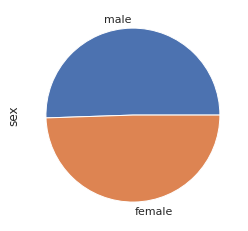

In [48]:
df.sex.value_counts().plot(kind='pie')

In [49]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

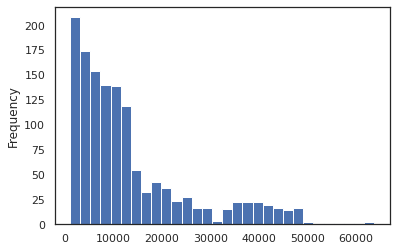

In [50]:
df.charges.plot(kind='hist',bins=30)

In [51]:
px.histogram(df,x='charges', width=700, height=400,nbins=50,facet_col='smoker',facet_row='sex')

In [52]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [53]:
corr = df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


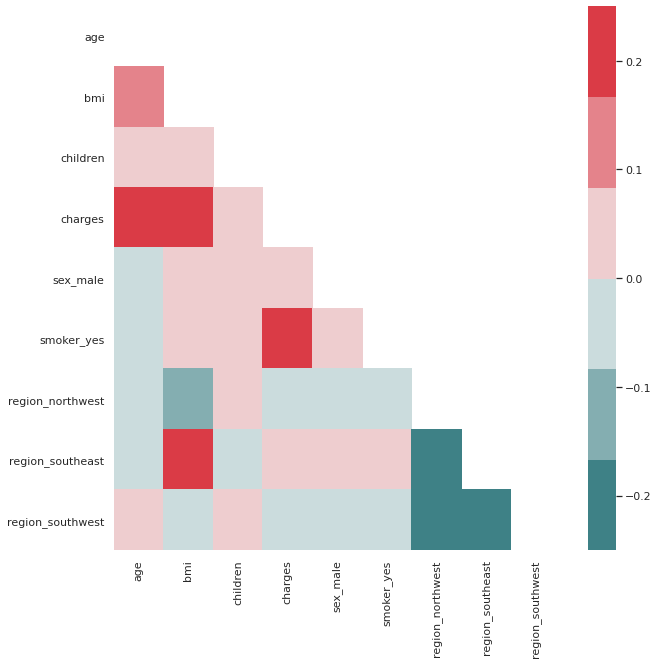

In [54]:
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.25, vmin=-0.25)

In [55]:
df_dummies.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

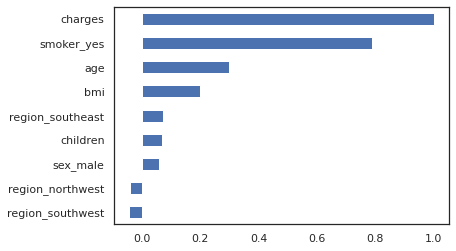

In [56]:
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [57]:
input=df_dummies.drop(columns='charges')
output=df_dummies['charges']
X_train, X_test, y_train, y_test = train_test_split(input,output, train_size=0.8)

In [58]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(f'R2 score: {r2_score:.4f}')

R2 score: 0.7464


In [59]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([13865.8107987 , 33581.3918383 , 30822.32778231, 11664.49762337,
        7735.11553856,  8708.94549188, 18342.60027121, 14712.02332004,
        2986.89041782,  5107.73207069])

In [60]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true':y_true, 'y_pred':y_pred})
predictions['error']=predictions['y_true'] = predictions['y_pred']
predictions.head()

,y_true,y_pred,error
27,13865.810799,13865.810799,13865.810799
38,33581.391838,33581.391838,33581.391838
441,30822.327782,30822.327782,30822.327782
1068,11664.497623,11664.497623,11664.497623
1310,7735.115539,7735.115539,7735.115539


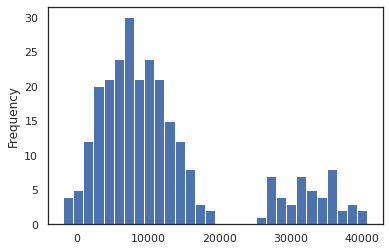

In [61]:
predictions.error.plot(kind='hist',bins=30)

In [62]:
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

MAE wynosi: 4077.66


In [63]:
X_train_ols = sm.add_constant(X_train.values)
ols = sm.OLS(endog=y_train,exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     401.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.90e-314
Time:                        11:12:26   Log-Likelihood:                -10837.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.234e+04   1116.446  

In [64]:
df_dummies_opt = df_dummies.drop(columns=['sex_male','region_northwest','region_southeast','region_southwest'])

In [65]:
input=df_dummies_opt.drop(columns='charges')
output=df_dummies_opt['charges']
X_train, X_test, y_train, y_test = train_test_split(input,output, train_size=0.8)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score_opt = regressor.score(X_test,y_test)
print(f'R2 score: {r2_score_opt:.4f}')
y_pred = regressor.predict(X_test)
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true':y_true, 'y_pred':y_pred})
predictions['error']=predictions['y_true'] = predictions['y_pred']
mae_opt = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

R2 score: 0.7657
MAE wynosi: 4077.66


In [66]:
raw_size = getsizeof(df_dummies)
opt_size = getsizeof(df_dummies_opt)
diff = 100-(opt_size/raw_size*100)
print('Dane zmniejszono o: %.2f procent ' % diff  )
print("Różnica R2 score: %.4f" % (r2_score-r2_score_opt))
print("Różnica błędu średniego: %.2f" % (mae-mae_opt))

Dane zmniejszono o: 8.89 procent 
Różnica R2 score: -0.0193
Różnica błędu średniego: 226.61
